# 오차역전파법 Backpropagation
: 가중치 매개변수의 기울기를 효율적으로 계산하는 방법

## 5.4 단순한 계층 구현하기
계층: 신경망의 기능 단위
- forward(): 순전파
- backward(): 역전파

### 5.4.1 곱셈 계층

In [1]:
class MulLayer:#곱셈 계층
    def __init__(self):#x,y 초기화
        self.x = None
        self.y = None
    
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x*y#곱
        
        return out
    
    def backward(self,dout):#dout : 상류에서 넘어온 미분
        dx = dout*self.y
        dy = dout*self.x
        
        return dx,dy

<b>순전파</b>

In [2]:
apple = 100
apple_num = 2
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price,tax)

print(price)

220.00000000000003


<b>역전파</b>: 각 변수에 대한 미분을 구할 수 있다

In [4]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)

In [5]:
print(dapple,dapple_num,dtax)

2.2 110.00000000000001 200


### 5.4.2 덧셈 계층

In [9]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self,x,y):
        out = x+y
        return out
    
    def backward(self,dout):
        dx = dout*1
        dy = dout*1
        return dx,dy

In [7]:
#(사과100원*2개+오렌지150원*3개)*1.1소비세

apple= 100
apple_num =2
orange = 150
orange_num = 3
tax = 1.1

In [10]:
#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer= MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)
price = mul_tax_layer.forward(all_price,tax)

#역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange,dorange_num = mul_orange_layer.backward(dorange_price)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num,dapple,dorange_num,dorange,dtax)

715.0000000000001
110.00000000000001 2.2 165.0 3.3000000000000003 650


## 5.5 활성화 함수 계층 구현하기
- ReLU
- Sigmoid

<b>ReLU</b>

In [23]:
class Relu:
    
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x<=10)
        out = x.copy()
        out[self.mask]=0
        
        return out
    
    def backward(self,dout):
        dout[self.mask]=0
        dx = dout
        return dx

In [14]:
#mask
import numpy as np
x = np.array([[1.0,-5.0],[-2.0,3.0]])
print(x)
mask =(x<0)

print(mask)

[[ 1. -5.]
 [-2.  3.]]
[[False  True]
 [ True False]]


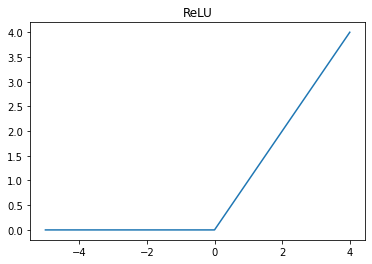

In [45]:
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5,5)
y = relu(x)
plt.title("ReLU")
plt.plot(x,y)
plt.show()

### 5.5.2 Sigmoid 계층

$$y = \frac{1}{1+exp(-x)}$$

In [46]:
class Sigmoid:
    def __init__(self):#초기화
        self.out = None
    
    def forward(self, x):#순전파
        out = 1/(1+np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self,dout):
        dx = dout(1.0-self.out)*self.out
        return dx

## 5.6 Affine/Softmax 계층 구현하기

### 5.6.1 Affine 계층(가중치 총합 계산)

In [47]:
X = np.random.rand(2)#입력
print(X)

[0.7300551  0.74176361]


In [48]:
W = np.random.rand(2,3)#가중치
print(W)

[[0.88877227 0.33391227 0.54673184]
 [0.95065224 0.95405294 0.80585062]]


In [50]:
B = np.random.rand(3)#편향
print(B)

[0.39201727 0.3345573  0.43558404]


In [51]:
print(X.shape)
print(W.shape)
print(B.shape)

(2,)
(2, 3)
(3,)


In [52]:
Y = np.dot(X,W)+B
print(Y)

[1.74602924 1.28601341 1.43247907]


In [55]:
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])#편향
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [57]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [58]:
dY = np.array([[1,2,3],[4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
dB = np.sum(dY,axis=0)
dB

array([5, 7, 9])

In [60]:
class Affine:
    def __init__(self,W,b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self,x):
        self.x=x
        out = np.dot(x,self.W)+self.b
        return out
    
    def backward(self,dout):
        dx = np.dot(dout,self.W.T)#self.dx가 왜 아니지?
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout,axis=0)
        
        return dx

배치용 cross_entropy_error

In [94]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

### 5.6.3 Softmax-with-Loss 계층

In [82]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y,self.t)
        return self.loss
    
    def backward(self,dout=1):#역전파
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/batch_size
        return dx

### 5.7.1 신경망 학습의 전체 그림<br>
<b>
- 1단계: 미니배치</b><br>
훈련데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라고 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다<br><br>
- <b>2단계: 기울기 산출(오차역전파법 활용)</b><br>
미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다<br><br>
- <b>3단계: 매개변수 갱신</b><br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신함<br><br>
- <b>4단계: 반복</b><br>
1~3단계를 반복

### 5.7.2 오차역전파법을 적용한 신경망 구현하기

In [83]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from collections import OrderedDict

In [113]:
#소프트맥스
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a =  np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

def numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)
        
        return grad
class TwoLayerNet:
    def __init__(self,input_size, hidden_size, output_size,weight_init_std = 0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
        #계층 생성
        self.layers= OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        return self.lastLayer.forward(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        if t.ndim != 1: t=  np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    #x: 입력 데이터 t: 정답 레이블
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads ={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x,t):#오차역전파법으로 구한 가중치 매개 변수의 기울기
        #순전파
        self.loss(x,t)
        
        #역전파
        dout = 1
        dout = self.lastLayer.backward(dout)#y-t 역전파
        
        layers = list(self.layers.values())
        layers.reverse()#계층 반대로 호출
        for layer in layers:
            dout = layer.backward(dout)
            
        #결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

### 5.7.3 오차역전파법으로 구한 기울기 검증하기
<b>기울기 확인 gradient check</b>

In [114]:
from dataset.mnist import load_mnist

#데이터 읽기
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

x_batch = x_train[:3]#입력
t_batch = t_train[:3]

In [105]:
x_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [106]:
t_batch

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [107]:
grad_numerical = network.numerical_gradient(x_batch,t_batch)#수치미분

In [109]:
grad_backprop = network.gradient(x_batch,t_batch)#역전파

In [110]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key]-grad_numerical[key]))
    print(key+":"+str(diff))

W1:0.0
b1:0.0
W2:0.0
b2:0.06666666678657077


수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다

### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [111]:
network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

In [117]:
iters_num = 10000#반복횟수
train_size = x_train.shape[0]
batch_size = 100#배치크기
learning_rate =0.1#학습률

train_loss_list =[]#손실함수 값
train_acc_list = []#훈련 정확도
test_acc_list = []#테스트 정확도

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #오차역전파법으로 기울기 구하기
    grad = network.gradient(x_batch,t_batch)
    
    #갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc,test_acc)

0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135


In [116]:
len(train_acc_list)

2